# In Class Notebook, Week 07

You can always find here: https://github.com/UIUC-iSchool-DataViz/is445_oauoag_spring2023/blob/master/week07/inClass_week07.ipynb  

Or into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

In [1]:
import bqplot
import geopandas
import matplotlib.pyplot as plt
import numpy as np

## A quick few mapping things with bqplot

In [3]:
# 1. data/"axis"
shape_data = bqplot.topo_load('map_data/WorldMap.json')

# 2. scales
sc_geo = bqplot.Mercator()

# 3. marks
shape_map = bqplot.Map(map_data=shape_data, 
                      scales={'projection':sc_geo})

# put it all together as a figure
fig = bqplot.Figure(marks=[shape_map],
                   fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [5]:
# 1. data/"axis"
shape_data = bqplot.topo_load('map_data/USStatesMap.json')

# 2. scales
#sc_geo = bqplot.Mercator()
sc_geo = bqplot.AlbersUSA()

# 3. marks
shape_map = bqplot.Map(map_data=shape_data, 
                      scales={'projection':sc_geo})

# put it all together as a figure
fig = bqplot.Figure(marks=[shape_map],
                   fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [6]:
!ls /Users/jnaiman/opt/anaconda3/pkgs/bqplot-0.12.30-pyhd8ed1ab_0/site-packages/bqplot/map_data/

EuropeMap.json     USCountiesMap.json USStatesMap.json   WorldMap.json


## Geopandas

In [7]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

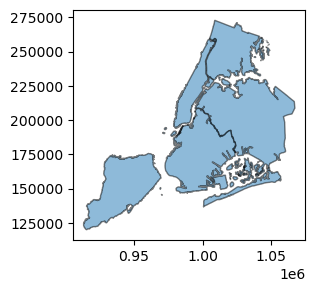

In [12]:
gdf = geopandas.read_file(geopandas.datasets.get_path('nybb'))
ax = gdf.plot(figsize=(3,3), edgecolor='k', alpha=0.5)

In [13]:
councils = geopandas.read_file('https://gisportal.champaignil.gov/ms/rest/services/Open_Data/Open_Data/MapServer/1/query?outFields=*&where=1%3D1&f=geojson')

In [14]:
councils.head()

,OBJECTID_1,District,Council_me,Shape.STArea(),Shape.STLength(),geometry
0,811,5,Vanna Pianfetti,1.843311e+08,209994.935616,"POLYGON ((-88.31441 40.11699, -88.31454 40.116..."
1,812,3,Daniel Iniguez,2.009197e+08,144362.359386,"POLYGON ((-88.27716 40.16364, -88.27732 40.163..."
2,813,1,Davion Williams,1.079102e+08,83420.370461,"POLYGON ((-88.22283 40.16000, -88.22283 40.160..."
3,814,4,Michael Foellmer,1.049800e+08,77363.320814,"POLYGON ((-88.26890 40.12733, -88.27076 40.127..."
4,815,2,Alicia Beck,5.289209e+07,58843.335293,"POLYGON ((-88.23537 40.10798, -88.23537 40.107..."
